# PRML  1.2.6  Bayesian curve fitting

2015/04/19  ysmrnbt

今回はベイズ推定。

最小二乗法では近似曲線をバシッと求めたのに対して、ベイズ推定では分布も良い感じに推定する事を目指す。

データとかノイズの分布として一番有名なのがガウス分布。正規分布とも言う。英語だとnormal distributionっていうくらい普通な分布。

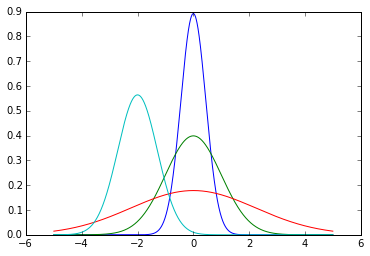

In [13]:
import numpy as np
from matplotlib import pyplot as plt

sigmas = [0.2, 1.0, 5.0, 0.5] # variation
myus = [0, 0, 0, -2] #mean

x = np.arange(-5., 5., 0.001) # data points from -5 to 5 per 0.001
for v in zip(sigmas,myus):
    y = (1./np.sqrt(2*np.pi*v[0])) * np.exp(-(x - v[1])**2/2/v[0]) #gaussian distribution
    plt.plot(x, y)

こんな感じhttp://d.hatena.ne.jp/xef/20120315/1331829958　で、平均(横軸)を中心値として、分散の大きさだけ横に広がっていく分布(狭いほど縦に伸びる)。

この時の平均と分散を、α、β、データ点に依存した形で求めるのがベイズ推定。メリットとしては

- 過学習に強い(正則化最小二乗法に近いため)
- データ点の数によって分布の広さが場所ごとに変わる(分布が大きかったり小さかったりする)

In [12]:
%matplotlib inline
#coding:utf-8
import numpy as np
from pylab import *
import sys

In [10]:
M = 10
ALPHA = 0.005
BETA = 28.0

ここで

- αは超パラメータ
- βは精度パラメータ
- そして最小二乗法の正則化の際に出て来たλ=α/βがregularization parameter

なのでλはかなり小さく設定する。βが大きい程、分散(1/β)が小さくなる＝分布が狭まる

# Definition

In [4]:
# reshape the data points as vertical vector
def phi(x):
    data = []
    for i in range(0, M+1):
        data.append(x**i)
    ret = np.matrix(data).reshape((M+1, 1))  # return as vertical vector
    return ret

In [5]:
# eq.1.70(derive mean of distribution)
def mean(x, xlist, tlist, S):
    sums = matrix(zeros((M+1, 1)))
    for n in range(len(xlist)):
        sums += phi(xlist[n]) * tlist[n]
    ret = BETA * phi(x).transpose() * S * sums
    return ret

In [6]:
# eq.1.71(derive variation of distribution)
def variance(x, xlist, S):
    ret = 1.0 / BETA + phi(x).transpose() * S * phi(x)
    return ret

# main

(-1.5, 1.5)

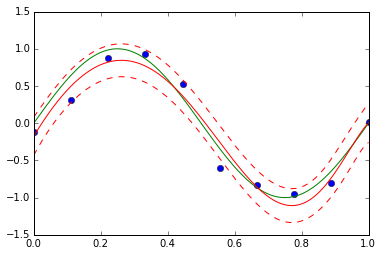

In [11]:
# training data
# sin(2*pi*x) with gaussian noise
xlist = np.linspace(0, 1, 10)
tlist = np.sin(2*np.pi*xlist) + np.random.normal(0, 0.2, xlist.size)
    
# calculate matrix S
sums = matrix(zeros((M+1, M+1)))
for n in range(len(xlist)):
    sums += phi(xlist[n]) * phi(xlist[n]).transpose()
I = matrix(np.identity(M+1))
S_inv = ALPHA * I + BETA * sums
S = S_inv.getI()

# ideal wave
xs = np.linspace(0, 1, 500)
ideal = np.sin(2*np.pi*xs)         # ideal wave

means = []
uppers = []
lowers = []

for x in xs:
    m = mean(x, xlist, tlist, S)[0,0]       # mean of predicted distribution
    s = np.sqrt(variance(x, xlist, S)[0,0]) # standard deviation of predicted distribution
    u = m + s                               
    l = m - s                               
    means.append(m)
    uppers.append(u)
    lowers.append(l)
    
plot(xlist, tlist, 'bo')  # training data
plot(xs, ideal, 'g-')     # ideal wave
plot(xs, means, 'r-')     # mean of predicted model
plot(xs, uppers, 'r--')   # +sigma
plot(xs, lowers, 'r--')   # -sigma
xlim(0.0, 1.0)
ylim(-1.5, 1.5)

今回の参考はここhttp://aidiary.hatenablog.com/entry/20100404/1270359720　でした。

ベイズの定理はまだあんまり理解してないので、今後も色々試していく予定。